In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rmspe(true, pred):
    try:
        rmspe = np.sqrt(np.mean(np.square((true - pred) / true))) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return rmspe

def mape(true, pred):
    try:
        mape = np.mean(abs((true - pred) / true)) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return mape

def accpe(true, pred):
    try:
#         accpe = abs((np.array(true)[-1] - np.array(pred)[-1]) / np.array(true)[-1]) * 100
        accpe = abs((true - pred) / true) * 100
    except ZeroDivisionError:
        print("denominator zero.")
    return accpe

simdf_true = pd.read_csv("data/soc/obd/daniel/true.csv")

simdf_pred = [
    pd.read_csv("data/soc/obd/daniel/naive.csv"),
    pd.read_csv("data/soc/obd/daniel/naive_avg.csv"),
    pd.read_csv("data/soc/obd/daniel/avg.csv"),
    pd.read_csv("data/soc/obd/daniel/exp_smoothing.csv")
]

simdf_pred_name = ['naive', 'naive_avg', 'avg', 'exp_smoothing']

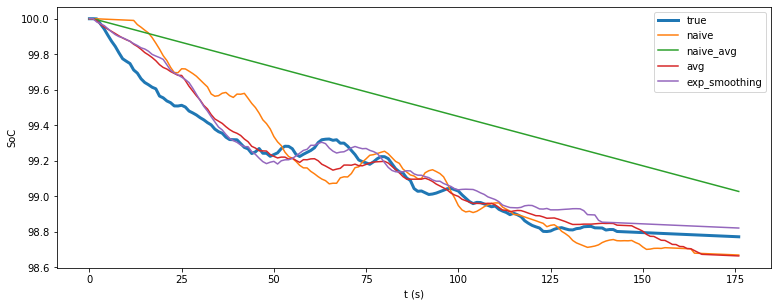

In [97]:
def preprocess_df(df):
    df = df.apply(lambda col: pd.to_numeric(col, errors='coerce'))
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    df = df['Soc']
#     df = df.map(lambda x: x * 100)
    return df

performance_rmspe = {}
performance_mape = {}
performance_accpe = {}

simdf_true = preprocess_df(simdf_true)

performance_rmspe['true']= rmspe(simdf_true, simdf_true)
performance_mape['true'] = mape(simdf_true, simdf_true)
performance_accpe['true'] = accpe(simdf_true, simdf_true)

ax0 = simdf_true.plot(linewidth=3.0)

for i, name in enumerate(simdf_pred_name):
    df = preprocess_df(simdf_pred[i])[:simdf_true.size]

    performance_rmspe[name]= rmspe(simdf_true, df)
    performance_mape[name] = mape(simdf_true, df)
    performance_accpe[name] = accpe(simdf_true, df)

    df.plot(ax=ax0)

plt.legend(['true'] + simdf_pred_name);
plt.xlabel('t (s)')
plt.ylabel('SoC')
plt.show()

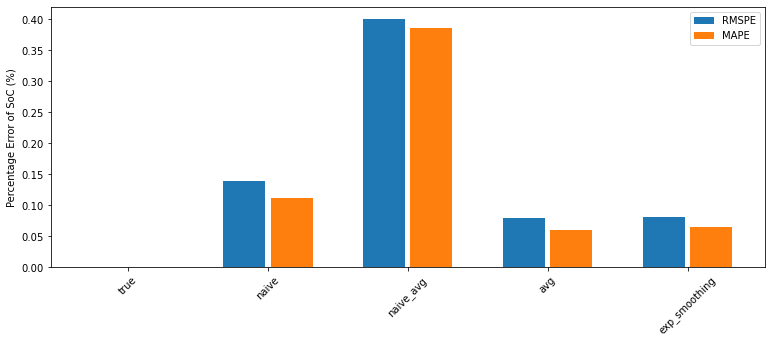

In [98]:
import matplotlib.pyplot as plt

x = np.arange(len(performance_rmspe))
width = 0.3

rmspe = [v for v in performance_rmspe.values()]
mape = [v for v in performance_mape.values()]
# accpe = [v for v in performance_accpe.values()]

plt.ylabel('Percentage Error of SoC (%)')
# plt.bar(x - 0.3, rmspe, width, label='RMSPE')
# plt.bar(x, mape, width, label='MAPE')
# plt.bar(x + 0.3, accpe, width, label='AccPE')
plt.bar(x - 0.17, rmspe, width, label='RMSPE')
plt.bar(x + 0.17, mape, width, label='MAPE')
plt.xticks(ticks=x, labels=performance_rmspe.keys(), rotation=45)
_ = plt.legend()